##### Hyperlink to kaggle dataset: [California Housing Prices Dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices)


## DATA DICTIONARY
| Feature              | Description                                                                 |
|----------------------|-----------------------------------------------------------------------------|
| **longitude**        | Longitude coordinate of the district.                                        |
| **latitude**         | Latitude coordinate of the district.                                         |
| **housing_median_age** | Median age of the houses in the district.                                    |
| **total_rooms**       | Total number of rooms in all houses within the district.                     |
| **total_bedrooms**    | Total number of bedrooms in all houses within the district.                  |
| **population**        | Total population of the district.                                            |
| **households**        | Total number of households in the district.                                  |
| **median_income**     | Median income of households in the district.                                |
| **median_house_value** | Median house value for households within the district.                      |
| **ocean_proximity**   | Proximity to the ocean (categorical variable).                              |


## STRUCTURE
1. Introduction: A brief introduction to the problem and the data.
2. Data Exploration: An exploration of the data, to understand its structure and its properties.
3. Data Preprocessing: The preprocessing of the data, to make it suitable for the model.
4. Modeling: The definition and training of one or more models.
5. Evaluation: The evaluation of the model, to understand how well it performs.
6. Conclusions: A summary of the findings and the conclusions. 

### 1. Intrduction
#### This report uses a simple linear regression model to predict California housing prices, based on several factors. We aim to identify the key factors, like median income, population and number of households, that best predict median house values and to rigorously assess each predictive model's performance. This thorough analysis will offer important understandings. These understandings are important for stakeholders seeking to understand the meaningful determinants of housing prices.

#### Import libaries 

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


### Import file from kaggle 

In [90]:

# For downloading datasets from Kaggle
import kaggle

# Download the dataset
kaggle.api.dataset_download_files("camnugent/california-housing-prices", path="./datasets/", unzip=True)


2025-02-02 19:55:30,750 WARNING Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'RemoteDisconnected('Remote end closed connection without response')': /api/v1/datasets/download/camnugent/california-housing-prices?datasetVersionNumber=None


Dataset URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices


In [91]:

dataframe = pd.read_csv(r".\datasets\housing.csv")

### Load dataset to see the content 

In [92]:

dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 2. Data Exploratory Analysis

#### Get a summary of the dataset, including column names, data types, and missing values.

In [93]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [94]:
dataframe.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

#### The describe() function provides summary statistics such as mean, standard deviation, min, max, and percentiles. 

In [95]:
dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### This counts the sum of missing values per column

In [96]:
dataframe.isnull().sum()  


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Data visualization : Scatter Plot 


In [97]:
sns.set_style('dark')

### The scater plot for Median House Value vs Median_Income

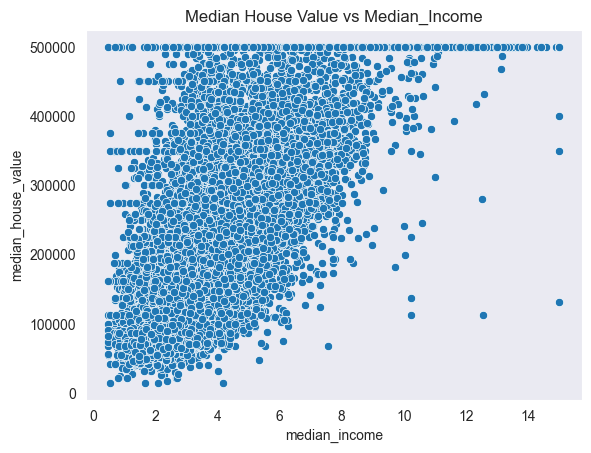

<Figure size 800x600 with 0 Axes>

In [98]:
sns.scatterplot(x= dataframe['median_income'],y= dataframe['median_house_value'] )
plt.title(f'Median House Value vs Median_Income')
plt.figure(figsize=(8, 6))
plt.show()

### Textual interpretation of the graphs
1. Direction: We can see that this has a **Postive** direction (postive correlation) . As the median income (independent variable) increases so does the median house value rise (dependent variable ). 
1. Form : We can see that ths has a moderatly (postive) **linear** form since it seems to follow a  nearly straight line. 
3. Strength: The data points are seen to be clustered along an upward slope  so we can say that plot has a moderately  **strong** linear relationship  but is infulenced by the presence of outliers. Meaning that the median income is a good predictor of the median house value. 
4. Outlier: We can see the presence of outliers at the 500000 point at the median house value , as well as some data points where high income points have low meidan house value  and vice versa . This could be due to data entry errors or specials cases or a target cap at 500000. 


#### Effects on the Linear regression model 
1. A positive correlation exists; as median income increases, median house value also rises.
2. The relationship is moderately linear, with data points generally following a straight line.
3. The linear relationship is moderately strong but impacted by outliers, which could distort predictions.
4. Outliers at high-income vs house-value points and inverse cases could bias the model.

### The scater plot for Median House Value vs Population

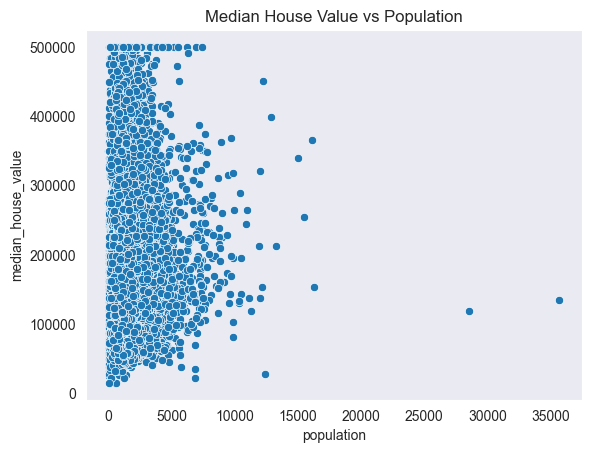

<Figure size 800x600 with 0 Axes>

In [99]:
sns.scatterplot(x= dataframe['population'],y= dataframe['median_house_value'] )
plt.title(f'Median House Value vs Population')
plt.figure(figsize=(8, 6))
plt.show()

#### Textual interpretation of the graphs
1. **Direction**: A postive direction would be an increase in both variables , while a negative direction would be an increase in the independent variable (population) and the a decrease in the dependent(median house value), but neither can be seen here. So we can say that this plot has **NO** clear direction. 
2. **Form**: We can neither see a linear/straight pattern or a curved pattern(non-linar) in this plot. So it is safe to say that scatter plot is quite random and has no specific form (relationship) between the population and the median house value. Therefore population is not a good predictor for the median house values. 
3. **Strength**: The data points being densely packed in some areas may want to give off the impression of it having a strong strength but NO . The lack of a clear direction suggest a weak correlation between the 2 variables . The closeness of the points rather indicate a clustered distrubtion. 
4. **Outlier**: Some data points are located far away from the main cluster of points, which could be due to various reasons potentially unusal cases. However since we cannot see a clear relationship(trend);the presence of outlier doesn't seem to significantly affect it.


#### Effects on the Linear regression model 
1. The $500,000 cap may bias predictions and limit the model's accuracy.
2. The linear regression model may give a very high error value, which means that the population woudn't be a good predictor for the median house value . 
3. The outlier values may pull the the regression line in a different direction also reducing predictive accuracy results. 

### The scater plot for Median House Value vs Households

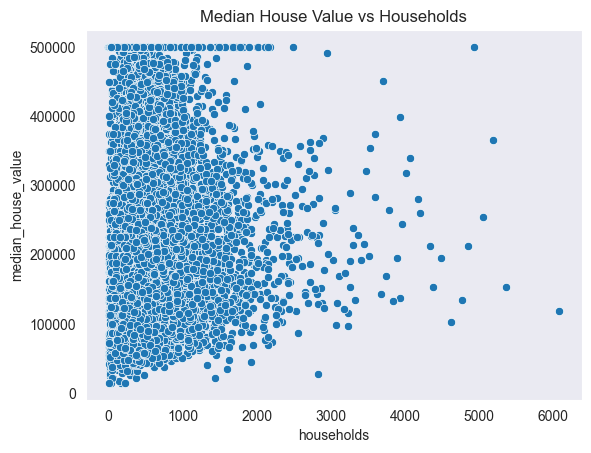

<Figure size 800x600 with 0 Axes>

In [100]:
sns.scatterplot(x= dataframe['households'],y= dataframe['median_house_value'] )
plt.title(f'Median House Value vs Households')
plt.figure(figsize=(8, 6))
plt.show()

#### Textual interpretation of the graphs
1. **Direction**: There is no clear upward or downward trend in the plot. This suggest that the number of households does not increase or decrease(direct relationship) with the median house value.Therefore we can conculde  that this plot has **NO clear direction**.  
2. **Form**: The data points do not follow a linar or non-linear pattern ,indicating that there is **NO strong  functional** relationshhip btween the households and median house value . 
3. **Strength**: Although the data points appearing densely packed in some areas may want to give off the impression of it having a strong correlation but NO . The absence of a clear direction trend  suggests a weak correlation between the 2 variables . The clustering of the points rather indicates the data distrubtion. 
4. **Outlier**:Some loctaions of the households data points have significantly  lower house value.Also some data points are located far away from the main cluster of points, which could be due to various reasons ,potentially unusal cases. There is also a ceiling effect at $500000 likely due to  reasons such as data collection limitation ultimately weaking the correlation analysis and may prevent an accuarte representation.  


#### Effects on the Linear regression model 
1. The $500,000 cap may bias predictions and limit the model's accuracy.
2. The linear regression model may give a weak correlation, which means that the househols woudn't be a good predictor for the median house value . 
3. The outlier values may pull the the regression line in a different direction also reducing predictive accuracy. 

## 3.  Data Pre-processing 

#### **Filtering Out Capped House Prices**

The dataset contains a **capped value** of `500001` for `median_house_value`, which may introduce bias in our model. To ensure accurate predictions, we need to **remove these capped records**.

In [101]:
price_filter = dataframe['median_house_value'] <= 500000  
dataframe = dataframe[price_filter]

### **Defining Features and Target Variable for Regression Models**

In this analysis, we aim to predict **median house value** (`y`) using different independent variables (`X`). We will create three separate models, each using a different independent variable.

In [102]:

y = dataframe['median_house_value']      ## The house price we want to predict (dependent variable)

## The independent varibles(predictors)
X_income = dataframe[['median_income']]   ## using median income as the predictor 
X_population = dataframe[['population']]   ## using population as the predictor 
X_households = dataframe[['households']]   ## using number of households as the predictor  

## the y variable remains the same in all cases 

## Train and Test Split

#### **Splitting Data into Training and Testing Sets**  

To evaluate our linear regression models effectively, we **split the data into training and testing sets** using the `train_test_split` function from `sklearn.model_selection`.  

- **Training set (70%)**: Used to train the model.  
- **Testing set (30%)**: Used to evaluate the model’s performance on unseen data.  
- `random_state=42`: Ensures reproducibility by setting a fixed seed.  


In [103]:

X_train_income, X_test_income, y_train, y_test = train_test_split(X_income, y, test_size=0.3, random_state=42) # Split the Medium Income into training and testing sets (70% train, 30% test)
X_train_pop, X_test_pop, y_train, y_test = train_test_split(X_population, y, test_size=0.3, random_state=42)   # Split the Population into training and testing sets (70% train, 30% test)
X_train_households, X_test_households, y_train, y_test = train_test_split(X_households, y, test_size=0.3,random_state=42)   # Split the data into training and testing sets (70% train, 30% test)

## 4. Modeling

#### Linear Regression Model Initialization and Fitting: This section of the code demonstrates how to initialize and fit a Linear Regression model to the training data.


### Median Income model definition

In [104]:
# Initialize the Linear Regression model
model_income = LinearRegression()
# Fit the model on the training data
model_income.fit(X_train_income, y_train)

LinearRegression()

### Population model definition 

In [105]:
# Initialize the Linear Regression model
model_pop = LinearRegression()
# Fit the model on the training data
model_pop.fit(X_train_pop, y_train)

LinearRegression()

###  Household model Definition

In [106]:
# Initialize the Linear Regression model
model_households = LinearRegression()
# Fit the model on the training data
model_households.fit(X_train_households, y_train)

LinearRegression()

#### Predictions using Trained Models

This section of the code demonstrates how to use the trained Linear Regression models to make predictions on the test data.


In [117]:

# Predict on the test data for median income
y_pred_income = model_income.predict(X_test_income)


# Predict on the test data for population
y_pred_pop = model_pop.predict(X_test_pop)

# Predict on the test data for households
y_pred_households = model_households.predict(X_test_households)

#  4. Evaluate the Model

For the Train and Test data:

* Print the slope and intercept
* Print the Mean Squared Error (MSE) and the Mean Absolute Error (MAE)
* Plot the regression line on top of the scatter plot of the training data

In [108]:

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE) for the median income
mse_income = mean_squared_error(y_test, y_pred_income)
mae_income = mean_absolute_error(y_test, y_pred_income)

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE) for the population 
mse_pop = mean_squared_error(y_test, y_pred_pop)
mae_pop = mean_absolute_error(y_test, y_pred_pop)

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE) for household
mse_households = mean_squared_error(y_test, y_pred_households)
mae_households = mean_absolute_error(y_test, y_pred_households)


### Storing Model Results in Dictionaries
This section of the code stores the results of the Linear Regression models, including the model's intercept, slope, mean squared error and mean absolute error, in dictionaries for easy access and reference.


In [118]:
# Store the results for the income model 
results_income = {
    'Model': 'median_house_value vs. median_income',
    'Intercept': model_income.intercept_,
    'Slope': model_income.coef_[0],
    'Mean Squared Error': mse_income,
    'Mean Absolute Error': mae_income
}

# Store the results for the population model 
results_pop = {
    'Model':'median_house_value vs. population',
    'Intercept': model_pop.intercept_,
    'Slope': model_pop.coef_[0],
    'Mean Squared Error': mse_pop,
    'Mean Absolute Error': mae_pop
}

# Store the results for the household model
results_households = {
    'Model': 'median_house_value vs. number_of_households',
    'Intercept': model_households.intercept_,
    'Slope': model_households.coef_[0],
    'Mean Squared Error': mse_households,
    'Mean Absolute Error': mae_households
}

In [119]:
# Create a DataFrame from the results dictionaries
results_df = pd.DataFrame([results_income, results_pop, results_households])
# Display the results
results_df

,Model,Intercept,Slope,Mean Squared Error,Mean Absolute Error
0,median_house_value vs. median_income,46150.011228,39838.128722,5.743030e+09,57470.747185
1,median_house_value vs. population,190102.906968,1.367498,9.834221e+09,79343.016669
2,median_house_value vs. number_of_households,179778.058898,24.522591,9.750760e+09,78798.006029


# Scatter Plot for Testing Data and Model Evaluation

This section visualizes the predictions from the Linear Regression model using a scatter plot, comparing the actual test data to the predicted values, and displaying key model evaluation metrics.


###     INCOME MODEL

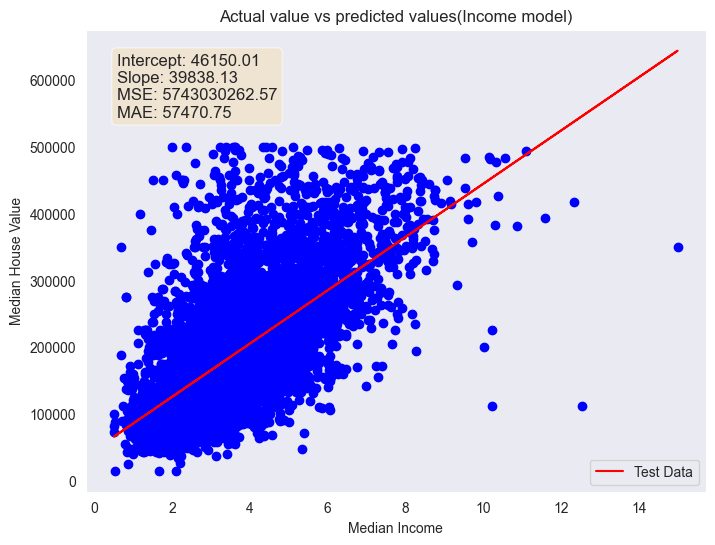

In [122]:

# Scatter plot for testing data (red)
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(X_test_income, y_pred_income, color="red", label="Test Data")
# Optionally, plot the regression line (prediction on test data)
plt.scatter(X_test_income, y_test, color="b")
textstr = '\n'.join((f'Intercept: {model_income.intercept_:.2f}',f'Slope: {model_income.coef_[0]:.2f}',f'MSE: {mse_income:.2f}',f'MAE: {mae_income:.2f}'))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)

# Add labels and title
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Actual value vs predicted values(Income model)")

# Show the legend
plt.legend()

# Display the plot
plt.show()

##  POPULATION MODEL

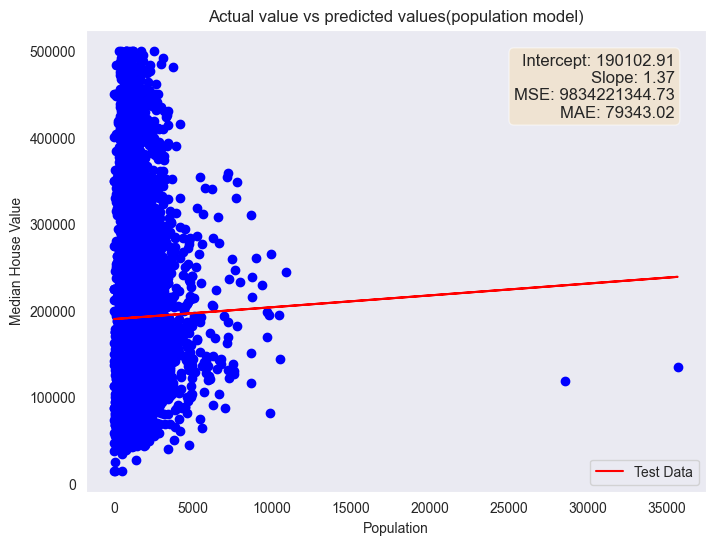

In [138]:

# Scatter plot for testing data (red)
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(X_test_pop, y_pred_pop, color="red", label="Test Data")
# Optionally, plot the regression line (prediction on test data)
plt.scatter(X_test_pop, y_test, color="b")
textstr = '\n'.join((f'Intercept: {model_pop.intercept_:.2f}', f'Slope: {model_pop.coef_[0]:.2f}',f'MSE: {mse_pop:.2f}',f'MAE: {mae_pop:.2f}'))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=12,verticalalignment='top', horizontalalignment = 'right', bbox=props)


# Add labels and title
plt.xlabel("Population")
plt.ylabel("Median House Value")
plt.title("Actual value vs predicted values(population model)")

# Show the legend
plt.legend()

# Display the plot
plt.show()

#### HOUSEHOLD MODEL

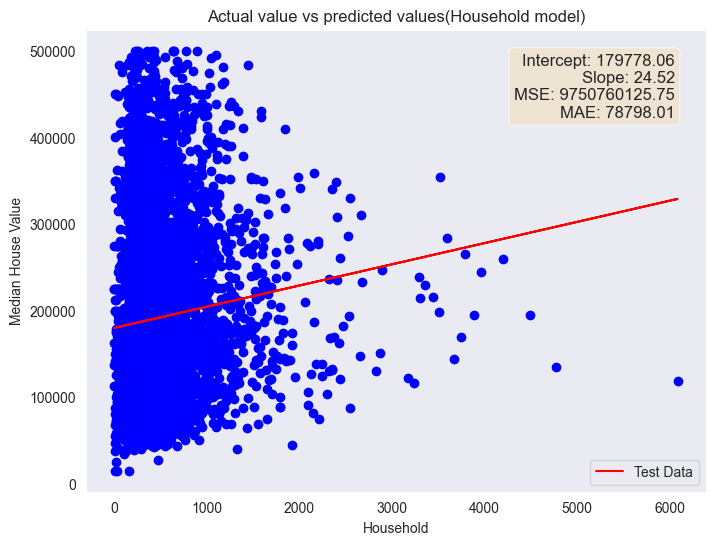

In [142]:

# Scatter plot for testing data (red)
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(X_test_households, y_pred_households, color="red", label="Test Data")
# Optionally, plot the regression line (prediction on test data)
plt.scatter(X_test_households, y_test, color="b")
textstr = '\n'.join((f'Intercept: {model_households.intercept_:.2f}', f'Slope: {model_households.coef_[0]:.2f}',f'MSE: {mse_households:.2f}',f'MAE: {mae_households:.2f}'))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=12,verticalalignment='top', horizontalalignment='right',bbox=props)

# Add labels and title
plt.xlabel("Household")
plt.ylabel("Median House Value")
plt.title("Actual value vs predicted values(Household model)")

# Show the legend
plt.legend()

# Display the plot
plt.show()

### 6. Conculsion

###  Univariate Linear Regression on the California Housing Prices Dataset

The objective of this practical lab was to develop and assess univariate linear regression models for predicting the **median house value** using three different independent variables: **median income**, **population**, and **number of households**.

#### **Model Performance Overview**

1. **Model 1: Median House Value vs. Median Income**
 This model demonstrates a strong, positive relationship between **median income** and **median house value**. The high slope value indicates that as median income increases, the median house value also rises, which aligns with economic expectations—wealthier areas tend to have higher property values. The **low MSE and MAE** suggest that this model fits the data well and provides reliable predictions.

2. **Model 2: Median House Value vs. Population**
The relationship between **population size** and **median house value** is positive, though it is relatively weak. The **small slope** (1.37) implies that population size does not have a substantial influence on house values. This is further reflected in the **higher MSE and MAE**, indicating that the model is less accurate compared to the first model. Thus, population size alone is a less reliable predictor for housing prices.

3. **Model 3: Median House Value vs. Number of Households**
 This model reveals a **moderate positive relationship** between the **number of households** and **median house value**, with the slope indicating a moderate increase in house value as the number of households rises. However, the **MSE and MAE** are comparable to the population model, suggesting that the number of households is not as strong a predictor as median income, though it still provides some predictive value.

#### **Key Insights and Model Comparison**

- **Strongest Predictor: Median Income**  
  The **median income** model outperforms the others in terms of fit, with the lowest **MSE** and **MAE**, indicating that income is the most significant predictor for housing prices in this dataset. This suggests that areas with higher median incomes tend to have higher house values, which aligns with general economic principles.

- **Weaker Predictors: Population and Number of Households**  
  Both **population** and **number of households** are weaker predictors, reflected in their higher **MSE** and **MAE** values. The small slopes in their respective models imply that these factors alone have limited predictive power for determining house prices. Their predictive value may be enhanced by incorporating additional variables in a more complex, multivariate model.

- **Goodness of Fit Comparison**  
  The **median income** model is the best fit among the three, providing the most accurate predictions. The other models, though still offering insights, show that **population** and **household numbers** are less influential when considered in isolation.

#### **Conclusion and Recommendations**

The **median income** model is the most robust and accurate predictor of **median house value** in this analysis, making it the preferred model for understanding housing price dynamics in this dataset. Given its low **MSE** and **MAE**, it demonstrates the strongest correlation with housing prices.

For further improvement, future analyses could explore **multivariate linear regression**, incorporating all three variables simultaneously to account for their combined effects on house prices. Additionally, other factors such as **housing age**, **room counts**, and **geographic factors (longitude, latitude)** might enhance the model's predictive power. 

By leveraging a more comprehensive set of features, a more accurate and nuanced model can be developed, providing even better insights for decision-making .
